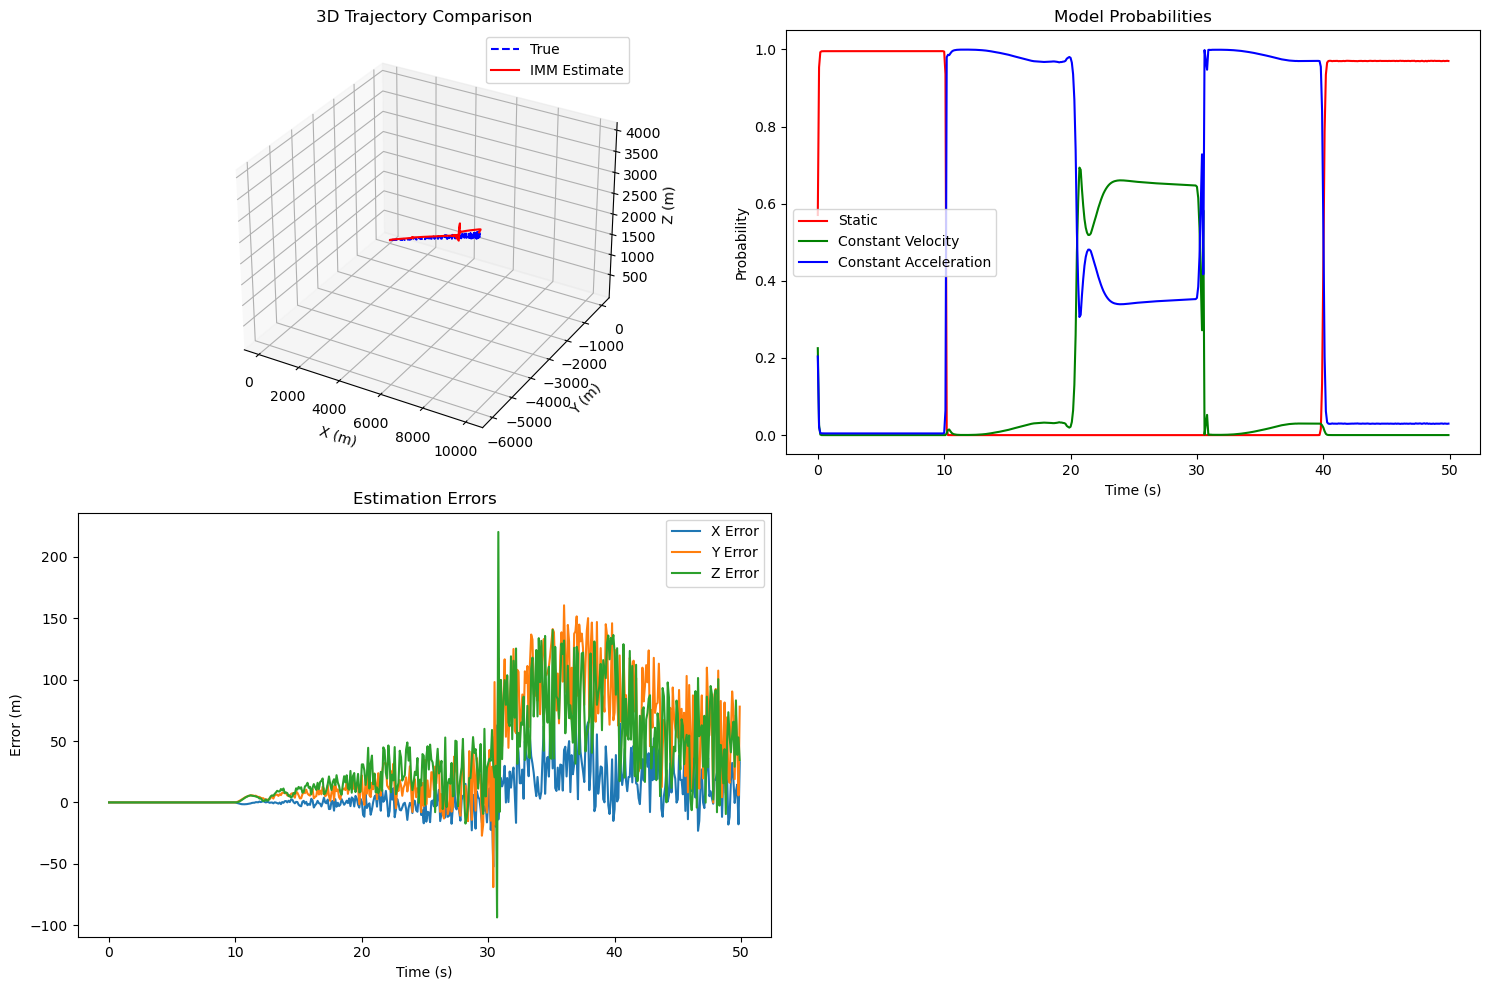

In [1]:
# visualize.py
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 读取数据
df = pd.read_csv("build/imm_results.csv")

# 创建画布
plt.figure(figsize=(15, 10))

# 3D轨迹
ax1 = plt.subplot(2, 2, 1, projection='3d')
ax1.plot(df['true_x'], df['true_y'], df['true_z'], 'b--', label='True')
ax1.plot(df['est_x'], df['est_y'], df['est_z'], 'r-', label='IMM Estimate')
ax1.set_xlabel('X (m)')
ax1.set_ylabel('Y (m)')
ax1.set_zlabel('Z (m)')
ax1.set_title('3D Trajectory Comparison')
ax1.legend()

# 模型概率
ax2 = plt.subplot(2, 2, 2)
ax2.plot(df['time'], df['prob_static'], 'r-', label='Static')
ax2.plot(df['time'], df['prob_cv'], 'g-', label='Constant Velocity')
ax2.plot(df['time'], df['prob_ca'], 'b-', label='Constant Acceleration')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Probability')
ax2.set_title('Model Probabilities')
ax2.legend()

# 误差分析
ax3 = plt.subplot(2, 2, 3)
ax3.plot(df['time'], df['est_x']-df['true_x'], label='X Error')
ax3.plot(df['time'], df['est_y']-df['true_y'], label='Y Error')
ax3.plot(df['time'], df['est_z']-df['true_z'], label='Z Error')
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Error (m)')
ax3.set_title('Estimation Errors')
ax3.legend()

plt.tight_layout()
plt.savefig('imm_results.png')
plt.show()